In [1]:
!pip install -U kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nawmee121","key":"cea99b9c80a2631c31dcfbdaf5241379"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#sudo kaggle competitions list
#!chmod 600 ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
#!export KAGGLE_USERNAME=[nawmee121]
#!export KAGGLE_KEY=4a3ad69e2b2ff1ffbe8a2d03b5ae8891

In [4]:
!kaggle datasets download -d vbookshelf/v2-plant-seedlings-dataset

100% 3.19G/3.19G [01:04<00:00, 64.5MB/s]
100% 3.19G/3.19G [01:04<00:00, 53.4MB/s]


In [5]:
from zipfile import ZipFile 
file_name="v2-plant-seedlings-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
!rm -r /content/v2-plant-seedlings-dataset.zip

In [7]:
import os
os.listdir('/content')

['.config',
 'Fat Hen',
 'Small-flowered Cranesbill',
 'Common Chickweed',
 'ShepherdΓÇÖs Purse',
 'Black-grass',
 'Scentless Mayweed',
 'Maize',
 'Sugar beet',
 'Charlock',
 'Loose Silky-bent',
 'Common wheat',
 'kaggle.json',
 'nonsegmentedv2',
 'Cleavers',
 'sample_data']

In [0]:
DATADIR='/content/nonsegmentedv2'

In [9]:
import os
import keras
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [10]:
print(os.listdir(r'/content/nonsegmentedv2'))
#print(os.listdir(r'/content/RiceDiseaseDataset/validation'))

['Fat Hen', 'Small-flowered Cranesbill', 'Common Chickweed', 'ShepherdΓÇÖs Purse', 'Black-grass', 'Scentless Mayweed', 'Maize', 'Sugar beet', 'Charlock', 'Loose Silky-bent', 'Common wheat', 'Cleavers']


In [0]:
#IMAGE_SIZE=224
NUM_CLASSES=12


In [12]:
classes=sorted(os.listdir(DATADIR))
print('There are {} having names:\n{}'.format(len(classes),classes))

There are 12 having names:
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'ShepherdΓÇÖs Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [0]:
CATEGORIES = ["Black-grass", "Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","ShepherdΓÇÖs Purse","Small-flowered Cranesbill","Sugar beet"]

In [0]:
# print(CATEGORIES.class_indices)

In [15]:
#\ reading all the images from the folders
images_list=dict()
for i in classes:
    images_list[i]=os.listdir(os.path.join(DATADIR, i))
    print('{0} \t--> {1}'.format(len(images_list[i]),i))

309 	--> Black-grass
452 	--> Charlock
335 	--> Cleavers
713 	--> Common Chickweed
253 	--> Common wheat
538 	--> Fat Hen
762 	--> Loose Silky-bent
257 	--> Maize
607 	--> Scentless Mayweed
274 	--> ShepherdΓÇÖs Purse
576 	--> Small-flowered Cranesbill
463 	--> Sugar beet


In [0]:
scores=[309,452,335,713,253,538,762,257,607,274,576,463]

In [0]:
positions=[0,1,2,3,4,5,6,7,8,9,10,11]

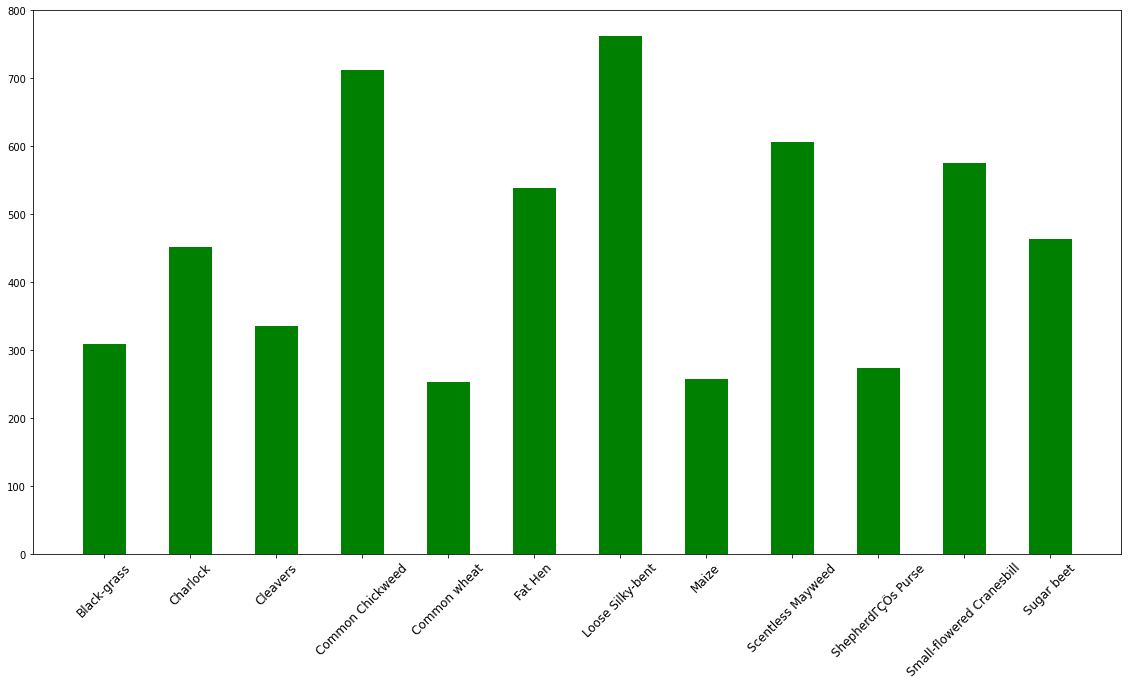

In [18]:
fig=plt.figure(figsize=(19.5,10))
plt.bar(positions,scores,width=.5,color="g")
plt.xticks(positions,CATEGORIES,rotation=45,fontsize=12)
plt.show()

[[[ 61  84  97]
  [ 59  82  94]
  [ 47  72  84]
  ...
  [ 50  72  89]
  [ 49  70  87]
  [ 53  72  89]]

 [[ 63  87  98]
  [ 63  86  97]
  [ 49  74  85]
  ...
  [ 54  73  87]
  [ 49  65  81]
  [ 43  58  75]]

 [[ 66  91 100]
  [ 59  84  92]
  [ 52  77  86]
  ...
  [ 46  61  76]
  [ 31  46  63]
  [ 20  33  53]]

 ...

 [[ 56  53  59]
  [ 65  61  66]
  [ 56  51  58]
  ...
  [ 45  43  51]
  [ 47  44  51]
  [ 51  48  54]]

 [[ 58  53  60]
  [ 60  54  61]
  [ 57  51  58]
  ...
  [ 42  40  47]
  [ 46  44  51]
  [ 50  48  54]]

 [[ 61  56  64]
  [ 59  53  60]
  [ 57  52  58]
  ...
  [ 33  32  39]
  [ 44  43  49]
  [ 45  44  50]]]


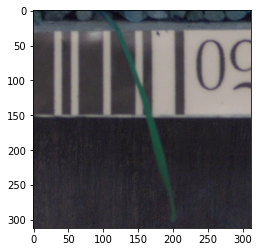

In [19]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        print(img_array)
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [0]:
IMG_SIZE = 224

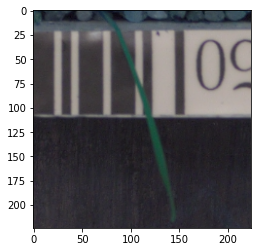

(224, 224, 3)

In [21]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()
new_array.shape

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  
        print('this is class num',class_num)

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [23]:

create_training_data()

print(len(training_data))

this is class num 0
this is class num 1
this is class num 2
this is class num 3
this is class num 4
this is class num 5
this is class num 6
this is class num 7
this is class num 8
this is class num 9
this is class num 10
this is class num 11
5539


In [24]:
cata=len(CATEGORIES)
print(cata)

12


In [0]:
#!rm -r /content/RiceDiseaseDataset

In [0]:
 import random
 random.shuffle(training_data)

In [27]:
for sample in training_data[:10]:
    print(sample[1])

8
8
7
7
2
6
5
8
2
11


In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)




In [0]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)
X=X/255.0


In [30]:
X.shape

(5539, 224, 224, 3)

In [31]:
y.shape

(5539,)

In [0]:
# print(y.class_indices)

In [0]:
import keras
import keras.utils
from keras import utils as np_utils
y = keras.utils.to_categorical(y, cata)

In [34]:
y.shape

(5539, 12)

In [35]:
for label in y[:10]:
    print(label)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1,  random_state=42)
print(y_train.shape, y_test.shape)
print(x_train.shape, x_test.shape)

(4985, 12) (554, 12)
(4985, 224, 224, 3) (554, 224, 224, 3)


In [0]:
#plt.figure()
# fig, axs = plt.subplots(nrows=3,ncols=4, sharex='all', sharey='all', figsize=( 15,  10))
# axs[0,0].set_title('Black-grass')
# axs[0,0].imshow(x_train[0])
# axs[0,1].set_title('Charlock')
# axs[0,1].imshow(x_train[1])
# axs[0,2].set_title('Cleavers')
# axs[0,2].imshow(x_train[2])
# axs[0,3].set_title('Common Chickweed')
# axs[0,3].imshow(x_train[3])
# axs[1,0].set_title('Common wheat')
# axs[1,0].imshow(x_train[4])
# axs[1,1].set_title('Fat Hen')
# axs[1,1].imshow(x_train[5])
# axs[1,2].set_title('Loose Silky-bent')
# axs[1,2].imshow(x_train[6])
# axs[1,3].set_title('Maize')
# axs[1,3].imshow(x_train[7])
# axs[2,0].set_title('Scentless Mayweed')
# axs[2,0].imshow(x_train[8])
# axs[2,1].set_title('ShepherdΓÇÖs Purse')
# axs[2,1].imshow(x_train[9])
# axs[2,2].set_title('Small-flowered Cranesbill')
# axs[2,2].imshow(x_train[10])
# axs[2,3].set_title('Sugar beet')
# axs[2,3].imshow(x_train[11])

# ******************************************

# plt.subplot(3,4,1)
# # plt.imshow(x_train[2])
# #axs[0,0].title('Cleavers')
# #plt.show()
# #
# #plt.figure()
# plt.subplot(3,4,2)
# plt.imshow(x_train[3])
# plt.title('Common Chickweed')

# #plt.figure()
# plt.subplot(3,4,3)
# plt.imshow(x_train[3])
# plt.title('Common Chickweed')

# #plt.figure()
# plt.subplot(3,4,4)
# plt.imshow(x_train[3])
# plt.title('Common Chickweed')

# plt.subplot(3,4,5)
# plt.imshow(x_train[3])
# plt.title('Common Chickweed')

In [0]:
del X
del y

In [0]:
# import argparse
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
# 	help="path to input dataset")
# ap.add_argument("-a", "--augment", type=int, default=-1,
# 	help="whether or not 'on the fly' data augmentation should be used")
# ap.add_argument("-p", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# args = vars(ap.parse_args())

In [0]:
from keras.preprocessing.image import ImageDataGenerator
#aug = ImageDataGenerator()

In [0]:
# if args["augment"] > 0:
# 	print("[INFO] performing 'on the fly' data augmentation")
gen = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.1,
		width_shift_range=0.1,
		height_shift_range=0.1,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

In [0]:
# plt.figure(figsize=[5,5])

# # Display the first image in training data
# plt.subplot(121)
# plt.imshow(x_train[0,:,:,:])
# plt.title("Training Data : {}".format(x_train[0]))

# # Display the first image in testing data
# plt.subplot(122)
# plt.imshow(x_test[0,:,:,:])
# plt.title("Testing Data : {}".format(x_test[0]))

In [43]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(x_train, y_train, test_size=0.11, random_state=50)
print(train_X.shape, valid_X.shape)
print(train_label.shape, valid_label.shape)

(4436, 224, 224, 3) (549, 224, 224, 3)
(4436, 12) (549, 12)


In [0]:
del x_train
del y_train

In [0]:
# train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

# This research work's created model

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten,Activation,concatenate,AveragePooling2D,GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 20
epochs = 150

In [0]:
classes=12
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(224, 224, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [0]:
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)

In [0]:
# filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

In [0]:
from keras.callbacks import ModelCheckpoint
# # checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks=[ModelCheckpoint('weight.model', monitor='val_accuracy', save_best_only=True,mode='max')]
# # callbacks_list = [checkpoint]
filepath = "dense.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [52]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 24) 648         input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 224, 224, 24) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 24) 0           activation_1[0][0]               
____________________________________________________________________________________________

In [53]:
history = model.fit_generator(gen.flow(train_X, train_label, batch_size=batch_size),epochs=epochs,verbose=2,validation_data=(valid_X, valid_label),callbacks=callbacks_list)

Epoch 1/150
 - 99s - loss: 1.6909 - accuracy: 0.4461 - val_loss: 2.5471 - val_accuracy: 0.2095

Epoch 00001: val_accuracy improved from -inf to 0.20947, saving model to dense.h5
Epoch 2/150
 - 87s - loss: 1.2665 - accuracy: 0.5884 - val_loss: 1.7288 - val_accuracy: 0.4390

Epoch 00002: val_accuracy improved from 0.20947 to 0.43898, saving model to dense.h5
Epoch 3/150
 - 87s - loss: 1.1016 - accuracy: 0.6483 - val_loss: 1.1361 - val_accuracy: 0.6175

Epoch 00003: val_accuracy improved from 0.43898 to 0.61749, saving model to dense.h5
Epoch 4/150
 - 87s - loss: 0.9293 - accuracy: 0.7169 - val_loss: 2.7428 - val_accuracy: 0.3188

Epoch 00004: val_accuracy did not improve from 0.61749
Epoch 5/150
 - 87s - loss: 0.8422 - accuracy: 0.7349 - val_loss: 0.8433 - val_accuracy: 0.7577

Epoch 00005: val_accuracy improved from 0.61749 to 0.75774, saving model to dense.h5
Epoch 6/150
 - 87s - loss: 0.7391 - accuracy: 0.7640 - val_loss: 0.8334 - val_accuracy: 0.7304

Epoch 00006: val_accuracy did no

# Validation set

In [0]:
model.load_weights("dense.h5")

In [91]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
y_pred1 = model.predict(valid_X,batch_size=1)
print(y_pred1.shape)
y_pred1=np.argmax(y_pred1,axis=1)
print(y_pred1.shape)
print(valid_label.shape)
valid_label1=valid_label
valid_label1=np.argmax(valid_label1,axis=1)
print(valid_label1.shape)
# y_pred1[1]
# print(y_pred1[1])
# print("//")
# y_pred[1]
# print("//")
# valid_label[1]
# #Print f1, precision, and recall scores
print('Precision score:')
print(precision_score(valid_label1, y_pred1,average='macro'))
print('recall score:')
print(recall_score(valid_label1, y_pred1,average='macro'))
print('f1 score:')
print(f1_score(valid_label1, y_pred1,average='macro'))

#print(recall_score(valid_label1, y_pred1,average='micro'))
# print('accuracy score:')
# print(accuracy_score(valid_label1, y_pred1))
# # val_pred=model.predict(valid_X,batch_size=40)
# # np.round(val_pred[1])

(549, 12)
(549,)
(549, 12)
(549,)
Precision score:
0.9344891844891844
recall score:
0.9448090919339537
f1 score:
0.9388111668065332


In [92]:
from sklearn.metrics import classification_report
cm_plot_labels=['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Small-flowered Cranesbill','Sugar beet']
# Generate a classification report
report = classification_report(valid_label1, y_pred1,target_names=cm_plot_labels)

print(report)
# precision=.96
# recall=.94
# f1=.947

                           precision    recall  f1-score   support

              Black-grass       0.80      0.87      0.83        23
                 Charlock       0.95      1.00      0.98        42
                 Cleavers       0.94      1.00      0.97        34
         Common Chickweed       0.99      0.94      0.96        78
             Common wheat       0.83      0.83      0.83        18
                  Fat Hen       0.89      1.00      0.94        49
         Loose Silky-bent       0.97      0.88      0.92        72
                    Maize       1.00      0.97      0.98        32
        Scentless Mayweed       0.97      0.97      0.97        63
       ShepherdΓÇÖs Purse       0.92      0.96      0.94        23
Small-flowered Cranesbill       1.00      0.96      0.98        56
               Sugar beet       0.95      0.97      0.96        59

                 accuracy                           0.95       549
                macro avg       0.93      0.94      0.94    

In [93]:
from sklearn.metrics import classification_report
cm_plot_labels=['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Small-flowered Cranesbill','Sugar beet']
# Generate a classification report
report = classification_report(valid_label1, y_pred1,target_names=cm_plot_labels)

print(report)

                           precision    recall  f1-score   support

              Black-grass       0.80      0.87      0.83        23
                 Charlock       0.95      1.00      0.98        42
                 Cleavers       0.94      1.00      0.97        34
         Common Chickweed       0.99      0.94      0.96        78
             Common wheat       0.83      0.83      0.83        18
                  Fat Hen       0.89      1.00      0.94        49
         Loose Silky-bent       0.97      0.88      0.92        72
                    Maize       1.00      0.97      0.98        32
        Scentless Mayweed       0.97      0.97      0.97        63
       ShepherdΓÇÖs Purse       0.92      0.96      0.94        23
Small-flowered Cranesbill       1.00      0.96      0.98        56
               Sugar beet       0.95      0.97      0.96        59

                 accuracy                           0.95       549
                macro avg       0.93      0.94      0.94    

[[20  0  0  0  1  1  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 73  0  2  0  0  0  0  0  2]
 [ 1  0  1  0 15  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0  0  0]
 [ 4  0  0  1  1  1 63  0  1  1  0  0]
 [ 0  0  0  0  0  0  1 31  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 61  1  0  1]
 [ 0  0  0  0  0  0  0  0  1 22  0  0]
 [ 0  0  1  0  1  0  0  0  0  0 54  0]
 [ 0  1  0  0  0  1  0  0  0  0  0 57]]


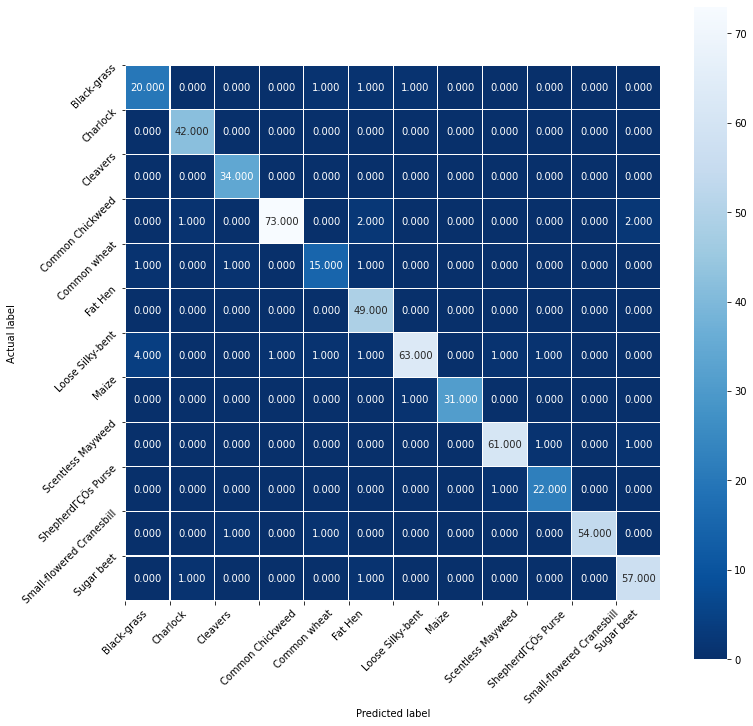

In [94]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn import metrics
    cm = metrics.confusion_matrix(valid_label1, y_pred1)
    print(cm)
    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.20, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.xticks(range(12), ['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Small-flowered Cranesbill','Sugar beet'], rotation=45,fontsize=10)
    plt.yticks(range(12), ['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Small-flowered Cranesbill','Sugar beet'],rotation=45, fontsize=10)
    plt.show()
    # /CATEGORIES = ["Black-grass", "Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","ShepherdΓÇÖs Purse","Small-flowered Cranesbill","Sugar beet"]

# Test set


In [95]:
test_eval =model.evaluate(x_test, y_test)

554/554 [==============================] - 3s 5ms/step


In [96]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22636396155460647
Test accuracy: 0.929602861404419


In [97]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
y_pred1 = model.predict(x_test,batch_size=1)
print(y_pred1.shape)
y_pred1=np.argmax(y_pred1,axis=1)
print(y_pred1.shape)
print(y_test.shape)
valid_label1=y_test
valid_label1=np.argmax(valid_label1,axis=1)
print(valid_label1.shape)
# y_pred1[1]
# print(y_pred1[1])
# print("//")
# y_pred[1]
# print("//")
# valid_label[1]
# #Print f1, precision, and recall scores
print('Precision score:')
print(precision_score(valid_label1, y_pred1,average='macro'))
print('recall score:')
print(recall_score(valid_label1, y_pred1,average='macro'))
print('f1 score:')
print(f1_score(valid_label1, y_pred1,average='macro'))

#print(recall_score(valid_label1, y_pred1,average='micro'))
# print('accuracy score:')
# print(accuracy_score(valid_label1, y_pred1))
# # val_pred=model.predict(valid_X,batch_size=40)
# # np.round(val_pred[1])

(554, 12)
(554,)
(554, 12)
(554,)
Precision score:
0.9248996522140337
recall score:
0.9265595320536613
f1 score:
0.9239934291107096


[[35  0  0  0  0  0  6  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  1  0  0  0  0]
 [ 0  0 36  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  1  1  1]
 [ 1  0  1  0 28  1  0  0  0  0  0  3]
 [ 0  0  0  0  0 51  0  0  0  0  0  0]
 [10  0  0  0  0  0 59  0  0  2  0  0]
 [ 0  0  0  0  0  0  0 26  1  0  0  0]
 [ 0  0  2  0  0  0  0  0 43  2  0  0]
 [ 0  2  1  0  0  0  0  0  0 19  0  0]
 [ 0  0  1  0  0  1  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 53]]


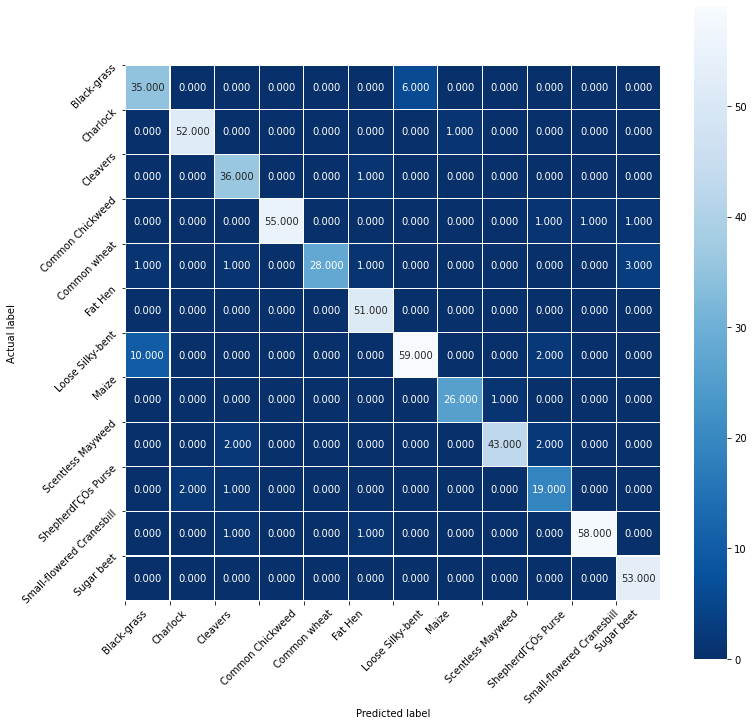

In [98]:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn import metrics
    cm = metrics.confusion_matrix(valid_label1, y_pred1)
    print(cm)
    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.20, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.xticks(range(12), ['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Small-flowered Cranesbill','Sugar beet'], rotation=45,fontsize=10)
    plt.yticks(range(12), ['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Small-flowered Cranesbill','Sugar beet'],rotation=45, fontsize=10)
    plt.show()
    # /CATEGORIES = ["Black-grass", "Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","ShepherdΓÇÖs Purse","Small-flowered Cranesbill","Sugar beet"]

In [99]:
from sklearn.metrics import classification_report
cm_plot_labels=['Black-grass','Charlock', 'Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','ShepherdΓÇÖs Purse','Cranesbill','Sugar beet']
# Generate a classification report
report = classification_report(valid_label1, y_pred1,target_names=cm_plot_labels)

print(report)

                    precision    recall  f1-score   support

       Black-grass       0.76      0.85      0.80        41
          Charlock       0.96      0.98      0.97        53
          Cleavers       0.88      0.97      0.92        37
  Common Chickweed       1.00      0.95      0.97        58
      Common wheat       1.00      0.82      0.90        34
           Fat Hen       0.94      1.00      0.97        51
  Loose Silky-bent       0.91      0.83      0.87        71
             Maize       0.96      0.96      0.96        27
 Scentless Mayweed       0.98      0.91      0.95        47
ShepherdΓÇÖs Purse       0.79      0.86      0.83        22
        Cranesbill       0.98      0.97      0.97        60
        Sugar beet       0.93      1.00      0.96        53

          accuracy                           0.93       554
         macro avg       0.92      0.93      0.92       554
      weighted avg       0.93      0.93      0.93       554



In [0]:
# valid_label[1]

In [0]:
# rounded_labels=np.argmax(valid_label, axis=1)
# rounded_labels[1]

In [0]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(valid_label, val_pred)
# cm

# acc curve

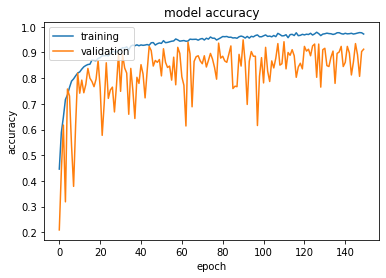

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# loss curve

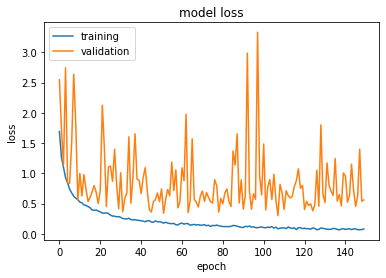

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [0]:
model.load_weights("dense.h5")